In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from jax import random
import jax.numpy as jnp
import numpyro.distributions as dist
import numpyro
import arviz as az 
from numpyro import infer 
from numpy import genfromtxt

Q1.

In [91]:
alpha = 5
beta = 0.1

num_samples = 1000
rng_key = random.PRNGKey(0)
samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

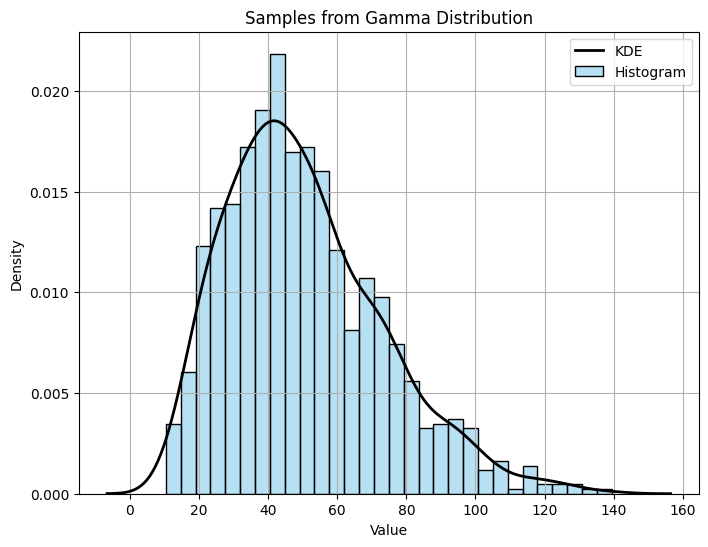

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(samples, bins=30, stat='density', color='skyblue', alpha=0.6, label='Histogram')
sns.kdeplot(samples, color='black', label='KDE', linewidth=2)

plt.title('Samples from Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

Q2.

In [93]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 5.0
beta = 0.1

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

50.129536 505.279


In [94]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 10 #doubled this. mean and variance is doubled.
beta = 0.1

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

100.21746 1010.0222


In [95]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 2.5 #half the alpha, half the mean and variance 
beta = 0.1

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

25.104382 252.6608


In [96]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 5.0
beta = 0.2

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

25.064768 126.31975


In [97]:
rng_key = random.PRNGKey(0)
def compute_statistics(alpha, beta, num_samples=10000):
    samples = dist.Gamma(alpha, beta).sample(rng_key, (num_samples,))

    mean_samples = jnp.mean(samples)
    var_samples = jnp.var(samples)
    
    return mean_samples, var_samples

alpha = 5.0
beta = 0.05 #changing beta made mean and variance 3 times or 4 more if we increase beta and less if we decrease beta

mean, variance = compute_statistics(alpha, beta)
print(mean, variance)

100.25907 2021.116


Q3.

In [98]:
data = genfromtxt('../data/data_yerr.dat', names=True, comments='#', delimiter='&')
data

array([( 1., 201., 592., 61.), ( 2., 244., 401., 25.),
       ( 3.,  47., 583., 38.), ( 4., 287., 402., 15.),
       ( 5., 203., 495., 21.), ( 6.,  58., 173., 15.),
       ( 7., 210., 479., 27.), ( 8., 202., 504., 14.),
       ( 9., 198., 510., 30.), (10., 158., 416., 16.),
       (11., 165., 393., 14.), (12., 201., 442., 25.),
       (13., 157., 317., 52.), (14., 131., 311., 16.),
       (15., 166., 400., 34.), (16., 160., 337., 31.),
       (17., 186., 423., 42.), (18., 125., 334., 26.),
       (19., 218., 533., 16.), (20., 146., 344., 22.)],
      dtype=[('index', '<f8'), ('x', '<f8'), ('y', '<f8'), ('sigm_y', '<f8')])

In [99]:
def linear_model(x, y=None, sigm_y=None):
    # Priors
    alpha = numpyro.sample("alpha", dist.Normal(0, 5))
    beta = numpyro.sample("beta", dist.Normal(0, 500))
    
    sigma = numpyro.sample("sigma", dist.Gamma(5, 1))  # Shape=5, Rate=1

    mu = alpha + beta * x

    with numpyro.plate("data", len(x)):
         numpyro.sample("obs", dist.Normal(mu, sigma), obs=y)

In [100]:
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

kernel = infer.NUTS(linear_model)
num_samples = 1000
mcmc = infer.MCMC(
    kernel,
    num_chains=2,
    num_warmup=1000,
    num_samples=num_samples)
mcmc.run(rng_key_,
         x=data['x'],
         y=data['y'],
         sigm_y=data['sigm_y'])
mcmc.print_summary()

C:\Users\rabin\AppData\Local\Temp\ipykernel_12244\854779569.py:6: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = infer.MCMC(
sample: 100%|██████████| 2000/2000 [00:00<00:00, 2161.99it/s, 1 steps of size 8.08e-01. acc. prob=0.90]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     alpha      3.22      5.02      3.07     -4.67     11.96   1590.98      1.00
      beta      2.24      0.08      2.24      2.09      2.38   1715.42      1.00
     sigma     66.17      4.40     66.01     58.84     73.45   1672.58      1.00

Number of divergences: 0


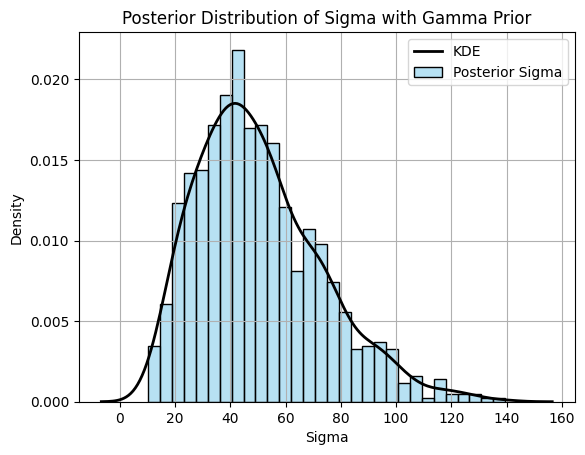

In [101]:
sns.histplot(samples, bins=30, kde=False, color='skyblue', stat='density', label='Posterior Sigma', alpha=0.6)
sns.kdeplot(samples, color='black', label='KDE', linewidth=2)

plt.title('Posterior Distribution of Sigma with Gamma Prior')
plt.xlabel('Sigma')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

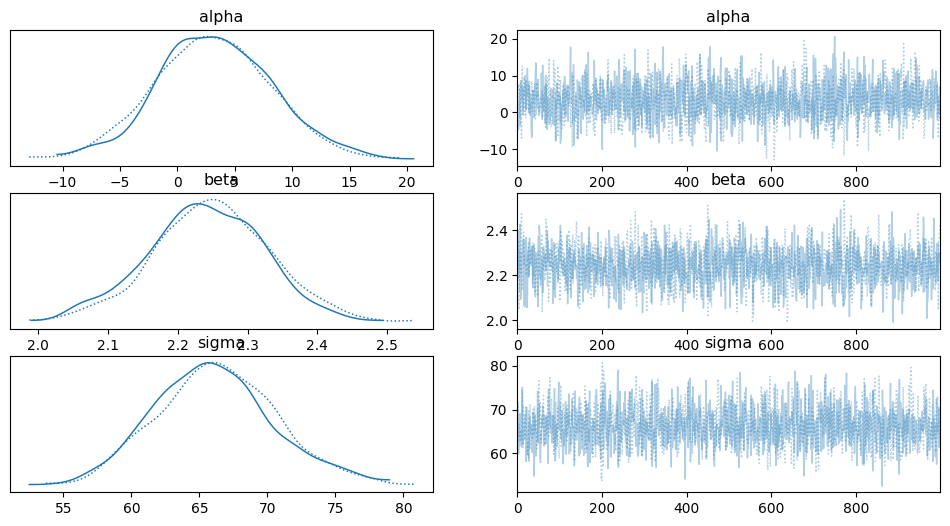

In [102]:
az.plot_trace(mcmc);

The change in prior distribution visibly change the posterior distributions for our synthetic data. In class, we did using Halfnormal distribution for sigma prior which gave us not so trustworthy result. However using gamma distribution for a sigma prior gave nicely distributed plot for each parameter.